https://github.com/Thinkful-Ed/data-201-assignment-solutions/blob/master/model_prep_data_exploration_2/solution.ipynb

```

# Example of clean and remove outliers

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'youtube'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

youtube_df = pd.read_sql_query('select * from youtube',con=engine)

# No need for an open connection, 
# because you're only doing a single query
engine.dispose()

# You're dealing with the missing values

youtube_df["Video Uploads"] = youtube_df["Video Uploads"].apply(str.strip).replace("--", np.nan)
youtube_df["Video Uploads"] = pd.to_numeric(youtube_df["Video Uploads"], downcast="float")

youtube_df["Subscribers"] = youtube_df["Subscribers"].apply(str.strip).replace("--", np.nan)
youtube_df["Subscribers"] = pd.to_numeric(youtube_df["Subscribers"], downcast="float")

youtube_df.Grade = youtube_df.Grade.apply(str.strip).replace("", np.nan)


youtube_df["Video Uploads"].fillna(youtube_df["Video Uploads"].mean(), inplace=True)
youtube_df["Subscribers"].fillna(youtube_df["Subscribers"].mean(), inplace=True)


# Apply one-way winsorization to the highest end
# of the value distribution. Because you have a lot of extreme
# values, set the values of the outliers to the 
# value of the ninetieth percentile. 
youtube_df["winsorized_uploads"] = winsorize(youtube_df["Video Uploads"], (0, 0.10))
youtube_df["winsorized_subscribers"] = winsorize(youtube_df["Subscribers"], (0, 0.10))
youtube_df["winsorized_views"] = winsorize(youtube_df["Video views"], (0, 0.10))

for i in range(0, len(youtube_df.Grade)):
    if pd.isnull(youtube_df.Grade[i]):
        youtube_df.Grade[i] = youtube_df.Grade[i-1]
        
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(youtube_df["Video views"], youtube_df["Video Uploads"])
plt.title("video views vs video uploads")

plt.subplot(1,3,2)
plt.scatter(youtube_df["Video views"], youtube_df["Subscribers"])
plt.title("video views vs subscribers")

plt.subplot(1,3,3)
plt.scatter(youtube_df["Video Uploads"], youtube_df["Subscribers"])
plt.title("video uploads vs subscribers")

plt.show()
```

```
# an alternitive to .describe()

# applying a function by passing
# a list of functions
  
grp = df.groupby('Name')
  
grp['Age'].agg([np.sum, np.mean, np.std])
```

```
# deep dive into groupby

grp = df.groupby('Name')
for name, group in grp:
    print(name)
    print(group)
    print()
```



```
# Bivariate: Continuous/Continuous

# scatterplot code

postgres_db = 'studentsperformance'

engine2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine2)

# No need for an open connection, 
# because you're only doing a single query
engine2.dispose()

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(student_df["math score"], student_df["reading score"])
plt.title("math score vs reading score")

plt.subplot(1,3,2)
plt.scatter(student_df["math score"], student_df["writing score"])
plt.title("math score vs writing score")

plt.subplot(1,3,3)
plt.scatter(student_df["reading score"], student_df["writing score"])
plt.title("reading score vs writing score")

plt.show()
```

```
# Get correlation matrix
student_df.corr()
```

```
# Heat map code

# Make the correlation matrices
corrmat_youtube = youtube_df.corr()

corrmat_student = student_df.corr()

# Heat maps are a great way to get 
# a quick visual read on a big correlation matrix.

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
# Draw the heat map using seaborn
sns.heatmap(corrmat_youtube, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Youtube)")

plt.subplot(1,2,2)
# Draw the heat map using seaborn
sns.heatmap(corrmat_student, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (student performance)")

plt.show()

# Try to match the correlation numbers 
# to the scatter plots above to get a 
# sense of what each magnitude of 
# correlation can look like.

```

Bivariate: Continuous - Continuous
- Scatter
- corr matrix
- corr heat map for visualization

```
# Bivariate: Continuous - Categorical

# Derive averages by group
youtube_df.groupby("Grade").mean()
```

```
# Bar Plots
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(youtube_df["Grade"], youtube_df["winsorized_uploads"])
plt.title("average uploads")

plt.subplot(1,3,2)
sns.barplot(youtube_df["Grade"], youtube_df["winsorized_subscribers"])
plt.title("average subscribers")

plt.subplot(1,3,3)
sns.barplot(youtube_df["Grade"], youtube_df["winsorized_views"])
plt.title("average views")

plt.show()
```

```
# Test whether group differences are significant
grades = youtube_df["Grade"].unique()
grouped_df = youtube_df.groupby("Grade")
for var in ["winsorized_uploads", "winsorized_subscribers", "winsorized_views"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(grades)):
        for j in range(i+1, len(grades)):
            print("t-test between groups {0} and {1}:".format(grades[i], grades[j]))
            print(stats.ttest_ind(
                youtube_df[youtube_df["Grade"]==grades[i]][var], 
                youtube_df[youtube_df["Grade"]==grades[j]][var]
            ))
```

Bivariate: Continuous - Categorical
- Group by
- box plots, bar plots, or other plots
- Formal test: either t test or ANOVA F-test

Bivariate: Categorical - Categorical
- crosstab
- count plot
- formal test: Chi-square 
  - beware of small sample sizes

```
# Cross tab

# Create crosstab of gender by race/ethnicity
count_table = pd.crosstab(student_df["gender"], student_df["race/ethnicity"])
count_table
```

```
# Chi Square

# This test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square test is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(count_table, axis=None))
```

Target Variable
- focus, but not exclusively
- multi target rare, not covered 
- Keep focus on GOAL
  - Model with least vars with most information

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind
import warnings

In [ ]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

In [ ]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# No need for an open connection, 
# because you're only doing a single query
engine.dispose()

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
cat_columns = student_df.columns[:-3]
for col in cat_columns: 
    print(student_df[col].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [ ]:
con_columns = student_df.columns[-3:]
for col in con_columns:
  print(col)
  print(student_df[col].describe())


math score
count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64
reading score
count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading score, dtype: float64
writing score
count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing score, dtype: float64


In [ ]:
# Derive averages by group
student_df.groupby("gender").mean()


,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [ ]:
# Derive averages by group
student_df.groupby("race/ethnicity").mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [ ]:
# Derive averages by group
student_df.groupby("parental level of education", sort=False).mean()

,math score,reading score,writing score
parental level of education,,,
bachelor's degree,69.389831,73.000000,73.381356
some college,67.128319,69.460177,68.840708
master's degree,69.745763,75.372881,75.677966
associate's degree,67.882883,70.927928,69.896396
high school,62.137755,64.704082,62.448980
some high school,63.497207,66.938547,64.888268


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


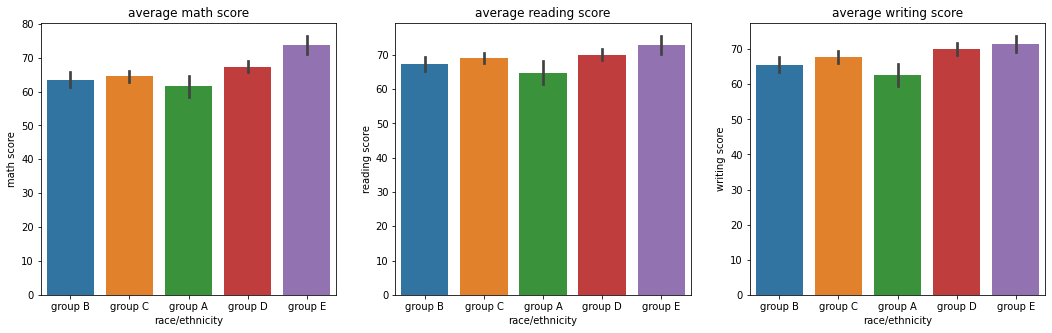

In [ ]:
# Bar Plots
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(student_df["race/ethnicity"], student_df["math score"])
plt.title("average math score")

plt.subplot(1,3,2)
sns.barplot(student_df["race/ethnicity"], student_df["reading score"])
plt.title("average reading score")

plt.subplot(1,3,3)
sns.barplot(student_df["race/ethnicity"], student_df["writing score"])
plt.title("average writing score")

plt.show()

In [ ]:
tstat, pvalue = ttest_ind(student_df[student_df.gender == "female"][["math score", "reading score", "writing score"]],
          student_df[student_df.gender == "male"][["math score", "reading score", "writing score"]])

In [ ]:
print(tstat)
print(pvalue)

[-5.38324587  7.95930801  9.97955791]
[9.12018555e-08 4.68053874e-15 2.01987771e-22]


In [ ]:
# Test whether group differences are significant.
ethnicities = student_df["race/ethnicity"].unique()
grouped_df = student_df.groupby("race/ethnicity")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(ethnicities)):
        for j in range(i+1, len(ethnicities)):
            print(
                "t-test between groups {0} and {1}:".format(ethnicities[i], ethnicities[j]))
            print(ttest_ind(
                student_df[student_df["race/ethnicity"]
                           == ethnicities[i]][var],
                student_df[student_df["race/ethnicity"] == ethnicities[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group D:


In [ ]:
# Test whether group differences are significant.
ethnicities = student_df["parental level of education"].unique()
grouped_df = student_df.groupby("parental level of education")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(ethnicities)):
        for j in range(i+1, len(ethnicities)):
            print(
                "t-test between groups {0} and {1}:".format(ethnicities[i], ethnicities[j]))
            print(ttest_ind(
                student_df[student_df["parental level of education"]
                           == ethnicities[i]][var],
                student_df[student_df["parental level of education"]
                           == ethnicities[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and associate's degree:

1. Are there any differences between the genders, ethnicities, and parental level of education with respect to student performances in exams?

---

Gender:
Yes, there is a signficant difference in reading, math, and writing scores between genders.

Race/Ethnicity:
math
```
t-test between groups group B and group D:
pvalue=0.004886197137104194
t-test between groups group B and group E:
pvalue=5.007946047497971e-09
t-test between groups group C and group D:
pvalue=0.015888349556016285
t-test between groups group C and group E:
pvalue=1.927238849552764e-09
t-test between groups group A and group D:
pvalue=0.0009068636053543751
t-test between groups group A and group E:
pvalue=1.083559122656415e-08
t-test between groups group D and group E:
pvalue=2.3187640326715042e-05
```

reading

```
t-test between groups group B and group D:
pvalue=0.0523786206559701)
t-test between groups group B and group E:
pvalue=0.0007951618495240944)
t-test between groups group C and group A:
pvalue=0.010364398025471079)
t-test between groups group C and group E:
pvalue=0.0069132842804986595)
t-test between groups group A and group D:
pvalue=0.002488654464332207)
t-test between groups group A and group E:
pvalue=6.463395931833847e-05)
t-test between groups group D and group E:
pvalue=0.045033306431345586)
```

writing

```
t-test between groups group B and group D:
pvalue=0.0014749978881319053)
t-test between groups group B and group E:
pvalue=0.0008032300486353951)
t-test between groups group C and group A:
pvalue=0.004610690740740428)
t-test between groups group C and group D:
pvalue=0.05930232918708209)
t-test between groups group C and group E:
pvalue=0.019183539018898285)
t-test between groups group A and group D:
pvalue=4.084805733969806e-05)
t-test between groups group A and group E:
pvalue=3.483278064499439e-05)
```

parent edu:
math

```
t-test between groups bachelor's degree and high school:
pvalue=2.9965345853843376e-05
t-test between groups bachelor's degree and some high school:
pvalue=0.0015409192922812146
t-test between groups some college and high school:
pvalue=0.00043498004192453146
t-test between groups some college and some high school:
pvalue=0.016324361572645503
t-test between groups master's degree and high school:
pvalue=0.000570929230228812
t-test between groups master's degree and some high school:
pvalue=0.008736228790471057
t-test between groups associate's degree and high school:
pvalue=9.247314274963044e-05
t-test between groups associate's degree and some high school:
pvalue=0.005041081492906143
```

reading

```
t-test between groups bachelor's degree and some college:
pvalue=0.028127555314401052
t-test between groups bachelor's degree and high school:
pvalue=8.804250310784477e-07
t-test between groups bachelor's degree and some high school:
pvalue=0.0007561971719730451
t-test between groups some college and master's degree:
pvalue=0.004165440800640354
t-test between groups some college and high school:
pvalue=0.0006001048481252139
t-test between groups some college and some high school:
pvalue=0.08726786856243877
t-test between groups master's degree and associate's degree:
pvalue=0.02926414570972208
t-test between groups master's degree and high school:
pvalue=6.257558119816884e-07
t-test between groups master's degree and some high school:
pvalue=0.00024334552617191513
t-test between groups associate's degree and high school:
pvalue=7.442167797135797e-06
t-test between groups associate's degree and some high school:
pvalue=0.006846770119677965
```

writting

```
t-test between groups bachelor's degree and some college:
pvalue=0.00771101202367254
t-test between groups bachelor's degree and associate's degree:
pvalue=0.03508162451719667
t-test between groups bachelor's degree and high school:
pvalue=2.4076253789515874e-10
t-test between groups bachelor's degree and some high school:
pvalue=4.628198526834338e-06
t-test between groups some college and master's degree:
pvalue=0.0016985933135959495
t-test between groups some college and high school:
pvalue=9.275017802620877e-06
t-test between groups some college and some high school:
pvalue=0.010358529086081357
t-test between groups master's degree and associate's degree:
pvalue=0.00578403270525775
t-test between groups master's degree and high school:
pvalue=9.326930296880332e-10
t-test between groups master's degree and some high school:
pvalue=4.275465153074631e-06
t-test between groups associate's degree and high school:
pvalue=1.4650545536741998e-07
t-test between groups associate's degree and some high school:
pvalue=0.0009435990258795855
```

2. Are there any differences between the lunch types with respect to student performances in exams? If there are, how do you explain this?

--

Yes, there is a significant difference in scores for different lunch types. 

In [ ]:
# Derive averages by group
student_df.groupby("lunch").mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [ ]:
tstat, pvalue = ttest_ind(student_df[student_df.lunch == "standard"][["math score", "reading score", "writing score"]],
          student_df[student_df.lunch == "free/reduced"][["math score", "reading score", "writing score"]])

In [ ]:
print(tstat)
print(pvalue)

[11.83718047  7.45105647  8.0097842 ]
[2.41319560e-30 2.00279665e-13 3.18618958e-15]


In [ ]:
count_table = pd.crosstab(student_df["lunch"], student_df["race/ethnicity"])
count_table

race/ethnicity,group A,group B,group C,group D,group E
lunch,,,,,
free/reduced,36,69,114,95,41
standard,53,121,205,167,99


In [ ]:
student_df.groupby("test preparation course").mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


3. Does the test preparation course seem to have an effect on the exam performances?

-- 

Yes, test preparation course has a significant effect on all scores. 

In [ ]:
tstat, pvalue = ttest_ind(student_df[student_df["test preparation course"] == "completed"][["math score", "reading score", "writing score"]],
          student_df[student_df["test preparation course"] == "none"][["math score", "reading score", "writing score"]])

In [ ]:
print(tstat)
print(pvalue)

[ 5.70461642  7.87166354 10.40917344]
[1.53591346e-08 9.08178334e-15 3.68529174e-24]


4. Which two exam scores are most correlated with each other?

writing and reading are the most correlated scores.

In [ ]:
corrmat_student = student_df.corr()
corrmat_student

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


Text(0.5, 1.0, 'correlation matrix (student performance)')

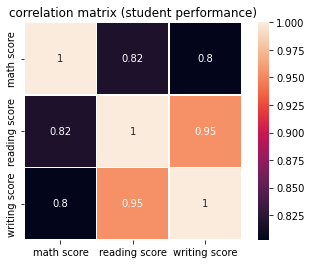

In [ ]:
# Draw the heat map using seaborn
sns.heatmap(corrmat_student, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (student performance)")


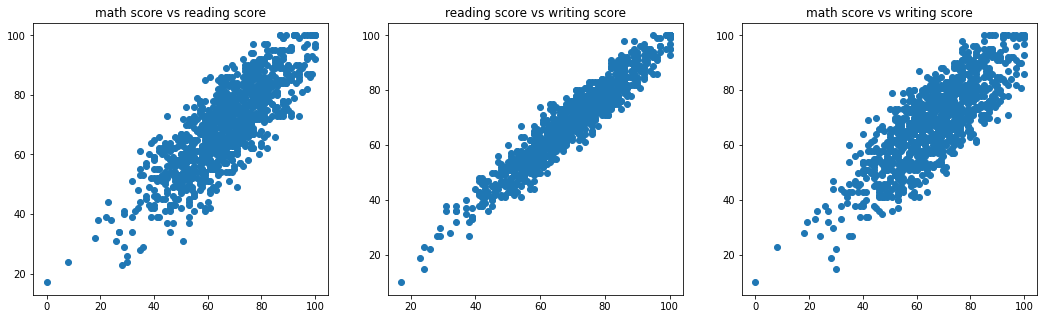

In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(student_df["math score"], student_df["reading score"])
plt.title("math score vs reading score")

plt.subplot(1,3,2)
plt.scatter(student_df["reading score"], student_df["writing score"])
plt.title("reading score vs writing score")

plt.subplot(1,3,3)
plt.scatter(student_df["math score"], student_df["writing score"])
plt.title("math score vs writing score")

plt.show()

In [ ]:
grouped_df = student_df.groupby("race/ethnicity")

In [ ]:
grouped_df.first()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
race/ethnicity,,,,,,,
group A,male,associate's degree,free/reduced,none,47,57,44
group B,female,bachelor's degree,standard,none,72,72,74
group C,female,some college,standard,completed,69,90,88
group D,male,high school,free/reduced,completed,64,64,67
group E,female,master's degree,free/reduced,none,56,72,65


In [ ]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
